<a href="https://colab.research.google.com/github/SenthamaraiSelvi/Data-Science/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/training.1600000.processed.noemoticon.csv',
                   encoding='latin-1',
                   header=None,
                   usecols=[0, 5],
                   names=['target', 'text'])


In [ ]:
data.dropna(inplace=True)

# Data exploration

In [ ]:
print("Data Shape:", data.shape)
print("Sample Data:\n", data.head())

Data Shape: (1600000, 2)
Sample Data:
    target                                               text
0       0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1       0  is upset that he can't update his Facebook by ...
2       0  @Kenichan I dived many times for the ball. Man...
3       0    my whole body feels itchy and like its on fire 
4       0  @nationwideclass no, it's not behaving at all....


Target Distribution (%):
 target
0    50.0
4    50.0
Name: proportion, dtype: float64


<ipython-input-6-c568ae14b1fb>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


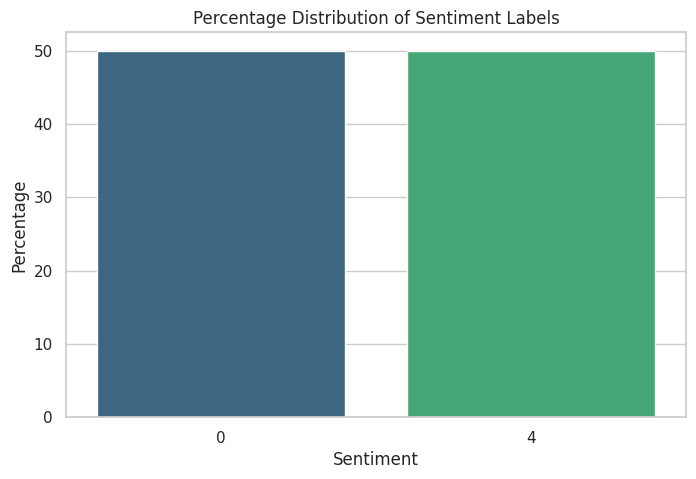

In [ ]:

label_counts = data['target'].value_counts(normalize=True) * 100  # Calculate percentages
print("Target Distribution (%):\n", label_counts)

# Plotting the distribution for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.xlabel("Sentiment")
plt.ylabel("Percentage")
plt.title("Percentage Distribution of Sentiment Labels")
plt.show()

In [ ]:
# Checking unique values in the target column
print("Unique values in target column:", data['target'].unique())


Unique values in target column: [0 4]


# Data preprocessing

In [ ]:
# Download the required resources
import nltk
import spacy
# Load the English language model
nlp = spacy.load("en_core_web_sm")

print(nltk.data.path)

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet',download_dir=".")

['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to ....
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Initialize the stemmer and stop words
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_and_stem(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs, mentions, hashtags, and digits
    text = re.sub(r"http\S+|www\S+|https\S+|@\w+|#\w+|\d+", "", text)

    # Remove punctuation
    text = re.sub(r"[^\w\s]", "", text)

    # Tokenize and stem each word, filtering out stop words
    tokens = [stemmer.stem(word) for word in text.split() if word not in stop_words]

    # Join tokens back into a single string
    return " ".join(tokens)

# Apply cleaning and stemming to the 'text' column
data['cleaned_text'] = data['text'].apply(clean_and_stem)


In [ ]:
data.head()

,target,text,cleaned_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",that bummer shoulda got david carr third day
1,0,is upset that he can't update his Facebook by ...,upset cant updat facebook text might cri resul...
2,0,@Kenichan I dived many times for the ball. Man...,dive mani time ball manag save rest go bound
3,0,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,"@nationwideclass no, it's not behaving at all....",behav im mad cant see


In [ ]:
# Sample 50 rows where the label is 0
sample_0 = data[data["target"] == 0].sample(n=5000, random_state=42)

# Sample 50 rows where the label is 4
sample_4 = data[data["target"] == 4].sample(n=5000, random_state=42)

# Combine the samples
sampled_data = pd.concat([sample_0, sample_4])

# Shuffle the final sampled data to randomize the order (optional)
sampled_data = sampled_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
X = sampled_data[['cleaned_text']].copy() # This keeps X as a DataFrame
y = sampled_data[['target']].copy()


In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

In [ ]:
import os
nltk_data_path = '/usr/local/share/nltk_data'

# Create the folder if it doesn't exist
if not os.path.exists(nltk_data_path):
    os.makedirs(nltk_data_path)

# Add this path to NLTK's search path
nltk.data.path.append(nltk_data_path)

# Download punkt into the specified directory
nltk.download('punkt', download_dir=nltk_data_path)


[nltk_data] Downloading package punkt to /usr/local/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt', force=True)  # Force re-download


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk_data_path = '/usr/local/share/nltk_data'

# Download 'punkt_tab' data
nltk.download('punkt_tab',nltk_data_path)

# Apply tokenization
X['tokenized'] = X['cleaned_text'].apply(lambda sentence: word_tokenize(sentence.lower()))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Apply tokenization
X['tokenized'] = X['cleaned_text'].apply(lambda sentence: word_tokenize(sentence.lower()))
# /usr/local/share/nltk_data/tokenizers/punkt_tab/english.pickle

In [ ]:
X["tokenized"].head()

,tokenized
0,"[found, perfect, titl, portfolio, song, love]"
1,"[new, antiviru, ive, instal, seem, effect, str..."
2,"[fact, still, love, himyou, learn, mistak, hop..."
3,"[think, got, ta, make, new, twitter, account, ..."
4,"[end, weekendback, work, tomorrow, need, longe..."


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[["cleaned_text"]], y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train.head()

,cleaned_text
5626,pub work lol pleas go yu yu want realli haha
3794,what new job firm respons long drop mail free
7758,new album rock would love come see u u ur uk t...
5472,got free fritter graham birthday even though w...
3054,help room


In [ ]:
import pandas as pd

In [ ]:
# Step 4: Text Vectorization
# BoW
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train["cleaned_text"].tolist())
X_test_bow = vectorizer.transform(X_test["cleaned_text"].tolist())
X_train_bow = pd.DataFrame(X_train_bow.toarray(), columns=vectorizer.get_feature_names_out())
X_test_bow = pd.DataFrame(X_test_bow.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
#tfidf
vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf= vectorizer_tfidf.fit_transform(X_train["cleaned_text"].tolist())
X_test_tfidf = vectorizer_tfidf.transform(X_test["cleaned_text"].tolist())
X_train_tfidf = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names_out())
X_test_tfidf = pd.DataFrame(X_test_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names_out())

In [ ]:
word2vec_model = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
def vectorize_sentence(sentence, model):
    # Get word vectors for each word in the sentence
    vectors = [model.wv[word] for word in sentence if word in model.wv]

    # If there are valid word vectors, return the mean, otherwise return a zero vector
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)  # Mean of word vectors
    else:
        return np.zeros(model.vector_size)  # Zero vector for sentences with no valid words

In [ ]:
import numpy as np
X_train_vectors = np.array([vectorize_sentence(sentence, word2vec_model) for sentence in X_train])
X_train_word2vec = pd.DataFrame(X_train_vectors)

In [ ]:
X_train_word2vec

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.003012,0.001986,0.001893,0.003509,-0.000366,-0.001803,0.003873,0.003836,-0.0041,-0.002366,...,0.000134,0.000321,0.000948,-0.002058,0.005073,0.002583,0.000763,-0.003323,0.000119,0.00064


In [ ]:
import pandas as pd
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Assuming X_train is your DataFrame and 'cleaned_text' is the column containing sentences
sentences = X_train['cleaned_text'].tolist()

# Prepare the data: Tag each sentence with a unique identifier
tagged_data = [TaggedDocument(words=sentence.split(), tags=[str(i)]) for i, sentence in enumerate(sentences)]

# Initialize and train the Doc2Vec model
model = Doc2Vec(vector_size=100, window=2, min_count=1, workers=4)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=10)

# Now we can infer the vector for each sentence
sentence_vectors = [model.infer_vector(sentence.split()) for sentence in sentences]

# Convert the list of vectors into a DataFrame
X_train_doc2vec = pd.DataFrame(sentence_vectors)


# Now, vectorize X_test sentences
test_sentences = X_test['cleaned_text'].tolist()

# Infer vectors for the sentences in X_test
test_vectors = [model.infer_vector(sentence.split()) for sentence in test_sentences]

# Convert the list of vectors into a DataFrame
X_test_doc2vec = pd.DataFrame(test_vectors)


# Show the resulting sentence vectors DataFrame
print(X_test_doc2vec.head())

         0         1         2         3         4         5         6   \
0 -0.011746  0.010472 -0.002683  0.004978  0.002408 -0.020292  0.002130   
1 -0.006291  0.005458  0.003276  0.007716 -0.000852 -0.029133  0.009662   
2 -0.003443  0.008610  0.000392  0.001025  0.005775 -0.015071  0.003138   
3 -0.006474  0.015019  0.001371  0.000057  0.006577 -0.047610  0.014021   
4 -0.005290  0.010027  0.001668 -0.001942  0.000441 -0.022443  0.006417   

         7         8         9   ...        90        91        92        93  \
0  0.034740 -0.006753 -0.014220  ...  0.018174  0.008498 -0.005544  0.005032   
1  0.031669 -0.017487 -0.012108  ...  0.014596  0.009809 -0.001103  0.002638   
2  0.018211 -0.006482 -0.006902  ...  0.015270  0.007908 -0.005444  0.003627   
3  0.056695 -0.018929 -0.027429  ...  0.024682  0.015096 -0.009722  0.003125   
4  0.028774 -0.016313 -0.009870  ...  0.008317  0.004439 -0.007622 -0.002123   

         94        95        96        97        98        99  
0  0

In [ ]:
# Step 5: Building and Training Logistic Regression Model
# Initialize logistic regression model
logistic_model_bow = LogisticRegression(max_iter=1000)
logistic_model_tfidf = LogisticRegression(max_iter=1000)
logistic_model_doc2vec = LogisticRegression(max_iter=1000)
# Train the model on the training set
logistic_model_bow.fit(X_train_bow, y_train)
logistic_model_tfidf.fit(X_train_tfidf, y_train)
logistic_model_doc2vec.fit(X_train_doc2vec, y_train)

y_pred_log_bow = logistic_model_bow.predict(X_test_bow)
y_pred_log_tfidf = logistic_model_tfidf.predict(X_test_tfidf)
y_pred_log_doc2vec = logistic_model_doc2vec.predict(X_test_doc2vec)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Initialize KNN models for different feature extraction methods
knn_model_bow = KNeighborsClassifier(n_neighbors=5)  # You can adjust the value of 'k'
knn_model_tfidf = KNeighborsClassifier(n_neighbors=5)
knn_model_doc2vec = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model on BOW, TF-IDF, and Doc2Vec embeddings
knn_model_bow.fit(X_train_bow, y_train)
knn_model_tfidf.fit(X_train_tfidf, y_train)
knn_model_doc2vec.fit(X_train_doc2vec, y_train)


# Predict using KNN for each feature extraction method
y_pred_knn_bow = knn_model_bow.predict(X_test_bow)
y_pred_knn_tfidf = knn_model_tfidf.predict(X_test_tfidf)
y_pred_knn_doc2vec = knn_model_doc2vec.predict(X_test_doc2vec)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

analyzer = SentimentIntensityAnalyzer()


def get_sentiment(text):
    sentiment_score = analyzer.polarity_scores(text)['compound']

    if sentiment_score >= 0.1:
        return 4
    else:
        return 0


y_pred_vader = [get_sentiment(text) for text in X_test["cleaned_text"]]


accuracy = accuracy_score(y_test, y_pred_vader)
mse=mean_squared_error(y_test, y_pred_vader)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'MSE: {mse}')


Accuracy: 61.70%
MSE: 6.128


In [ ]:
accuracy_log_bow = accuracy_score(y_test, y_pred_log_bow)
accuracy_log_tfidf = accuracy_score(y_test, y_pred_log_tfidf)
accuracy_log_doc2vec = accuracy_score(y_test, y_pred_log_doc2vec)

accuracy_knn_bow = accuracy_score(y_test, y_pred_knn_bow)
accuracy_knn_tfidf = accuracy_score(y_test, y_pred_knn_tfidf)
accuracy_knn_doc2vec = accuracy_score(y_test, y_pred_knn_doc2vec)

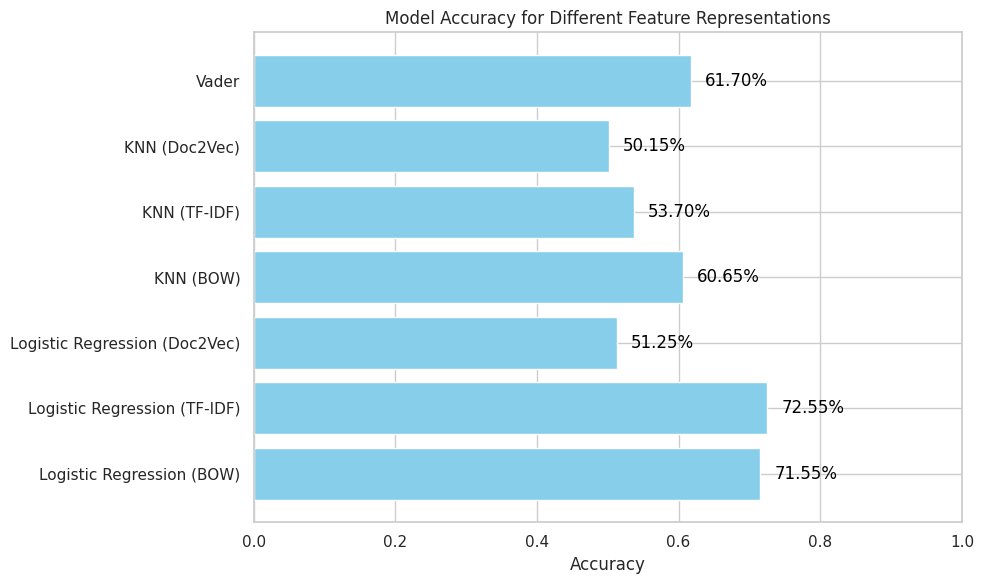

In [ ]:
import matplotlib.pyplot as plt

# Data for models and their corresponding accuracies
models = ['Logistic Regression (BOW)', 'Logistic Regression (TF-IDF)', 'Logistic Regression (Doc2Vec)',
          'KNN (BOW)', 'KNN (TF-IDF)', 'KNN (Doc2Vec)','Vader']
accuracies = [accuracy_log_bow, accuracy_log_tfidf, accuracy_log_doc2vec,
              accuracy_knn_bow, accuracy_knn_tfidf, accuracy_knn_doc2vec,accuracy]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color='skyblue')

# Adding labels and title
plt.xlabel('Accuracy')
plt.title('Model Accuracy for Different Feature Representations')
plt.xlim(0, 1)  # Accuracy range between 0 and 1 (100%)

# Display the accuracy values on the bars
for i, v in enumerate(accuracies):
    plt.text(v + 0.02, i, f'{v * 100:.2f}%', va='center', color='black')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error


# Calculate Mean Squared Error (MSE) for each model's predictions
mse_log_bow = mean_squared_error(y_test, y_pred_log_bow)
mse_log_tfidf = mean_squared_error(y_test, y_pred_log_tfidf)
mse_log_doc2vec = mean_squared_error(y_test, y_pred_log_doc2vec)

mse_knn_bow = mean_squared_error(y_test, y_pred_knn_bow)
mse_knn_tfidf = mean_squared_error(y_test, y_pred_knn_tfidf)
mse_knn_doc2vec = mean_squared_error(y_test, y_pred_knn_doc2vec)

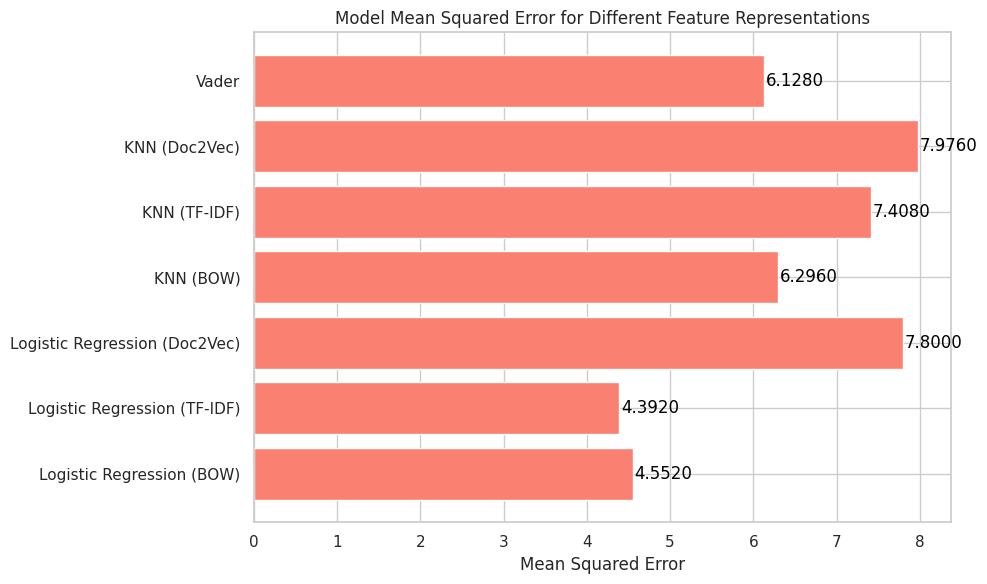

In [ ]:

models = ['Logistic Regression (BOW)', 'Logistic Regression (TF-IDF)', 'Logistic Regression (Doc2Vec)',
          'KNN (BOW)', 'KNN (TF-IDF)', 'KNN (Doc2Vec)','Vader']
mse_values = [mse_log_bow, mse_log_tfidf, mse_log_doc2vec,
              mse_knn_bow, mse_knn_tfidf, mse_knn_doc2vec,mse]

# Create a bar plot for MSE
plt.figure(figsize=(10, 6))
plt.barh(models, mse_values, color='salmon')

# Adding labels and title
plt.xlabel('Mean Squared Error')
plt.title('Model Mean Squared Error for Different Feature Representations')

# Display the MSE values on the bars
for i, v in enumerate(mse_values):
    plt.text(v + 0.02, i, f'{v:.4f}', va='center', color='black')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
sentiment = analyzer.polarity_scores("")

# Print the sentiment scores
print(sentiment)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [ ]:
sentiment = analyzer.polarity_scores("Congratulations for your success")

# Print the sentiment scores
print(sentiment)

{'neg': 0.0, 'neu': 0.208, 'pos': 0.792, 'compound': 0.8225}


In [ ]:
analyzer.lexicon.update({
    'awesome': 3.0,
    'terrible': -3.0,
    'mediocre': -0.5
})